# Task-05

# Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

# install the required package

In [1]:
pip install folium

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset :- https://www.kaggle.com/code/harshalbhamare/us-accident-eda

In [3]:

# Load the data
data = pd.read_csv("only_road_accidents_data_month2.csv")
data


,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,West Bengal,2010,1245,1150,1349,1246,1172,1284,1231,1190,1128,1227,1251,1252,14725
486,West Bengal,2011,1350,1179,1314,1148,1220,1241,1185,1074,1112,1214,1161,1270,14468
487,West Bengal,2012,1346,1383,1357,1270,1352,1434,1349,1204,1112,1251,1179,1371,15608
488,West Bengal,2013,1564,1382,1474,1392,1629,1391,1315,1208,1228,1299,1335,1332,16549


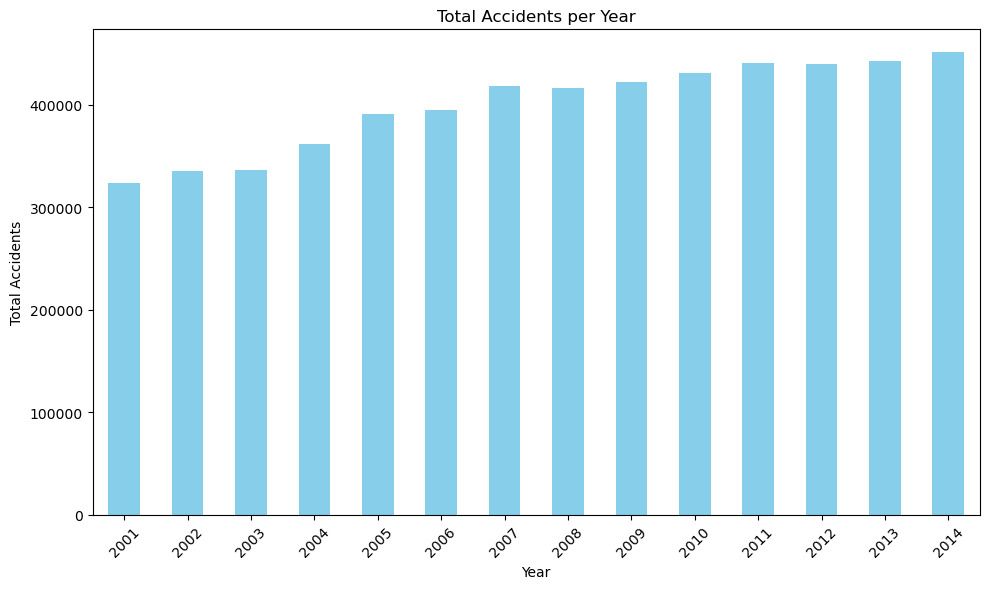

In [4]:
# Calculate monthly and yearly totals
data['MONTHLY_TOTAL'] = data.iloc[:, 2:14].sum(axis=1)
yearly_totals = data.groupby('YEAR')['MONTHLY_TOTAL'].sum()

# Plot yearly totals
plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='bar', color='skyblue')
plt.title('Total Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




A & N Islands: Total Accidents - 2893


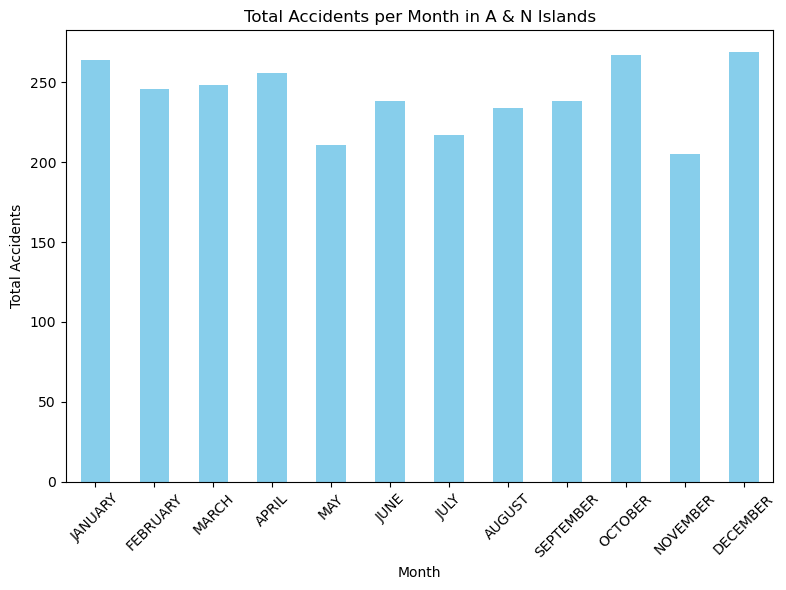


Andhra Pradesh: Total Accidents - 546821


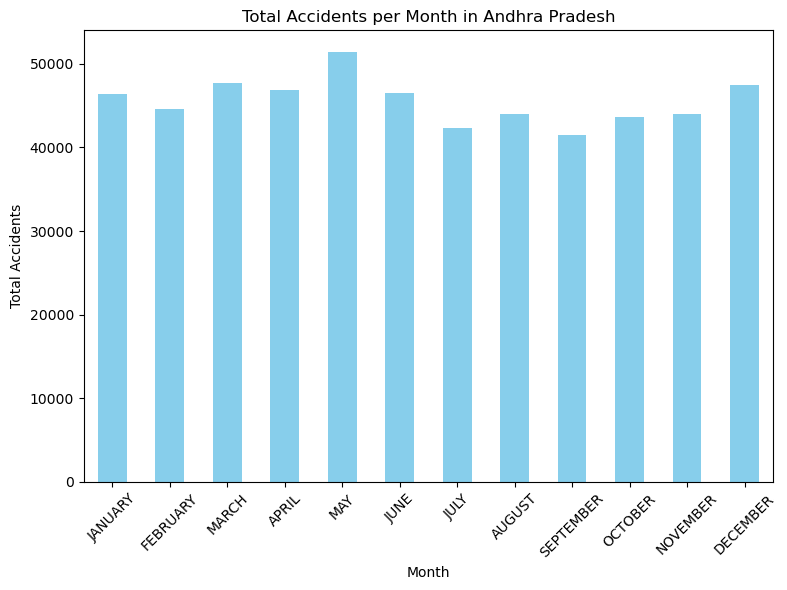


Arunachal Pradesh: Total Accidents - 3389


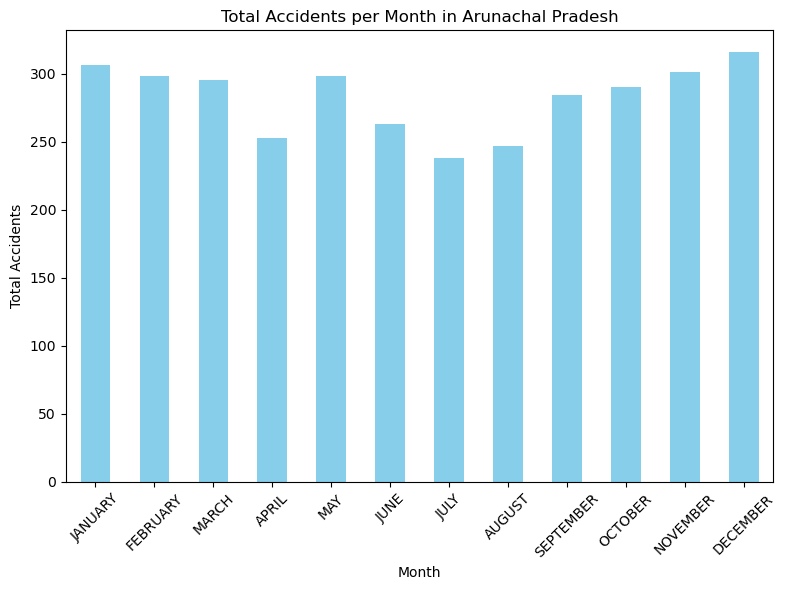


Assam: Total Accidents - 61718


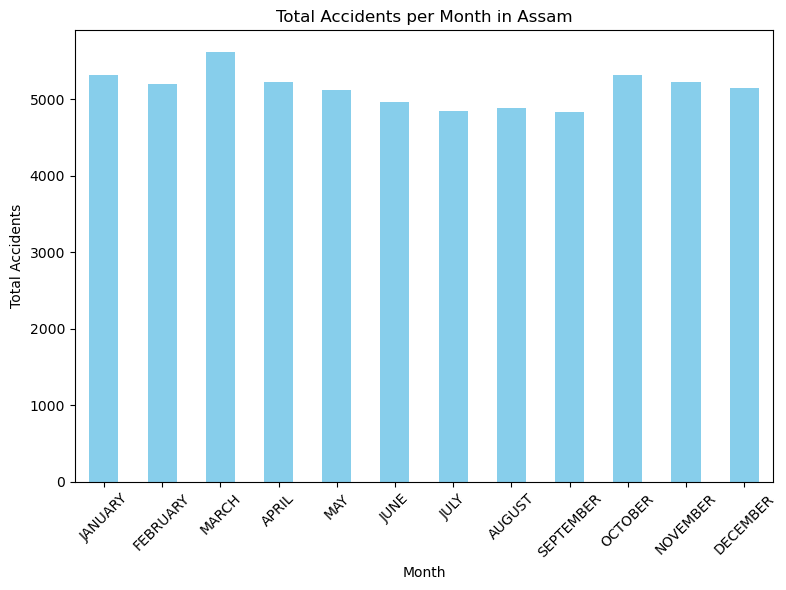


Bihar: Total Accidents - 92648


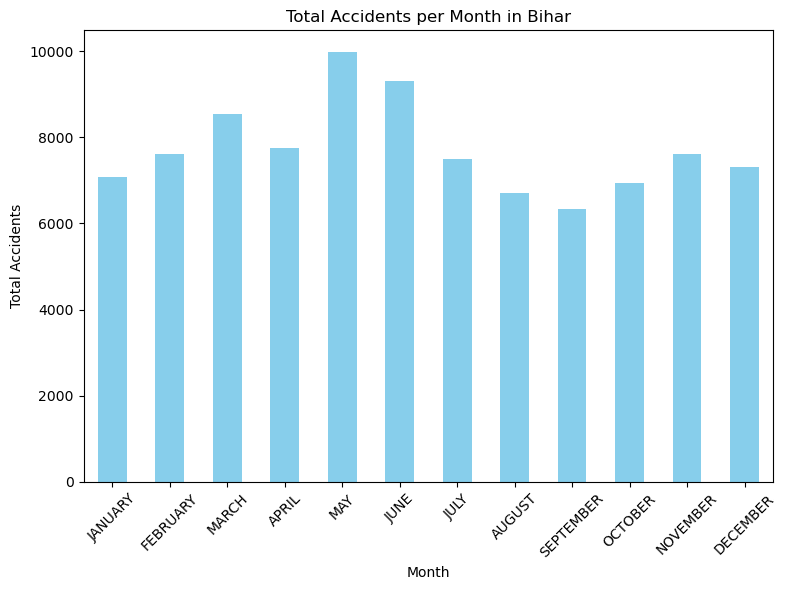


Chandigarh: Total Accidents - 6411


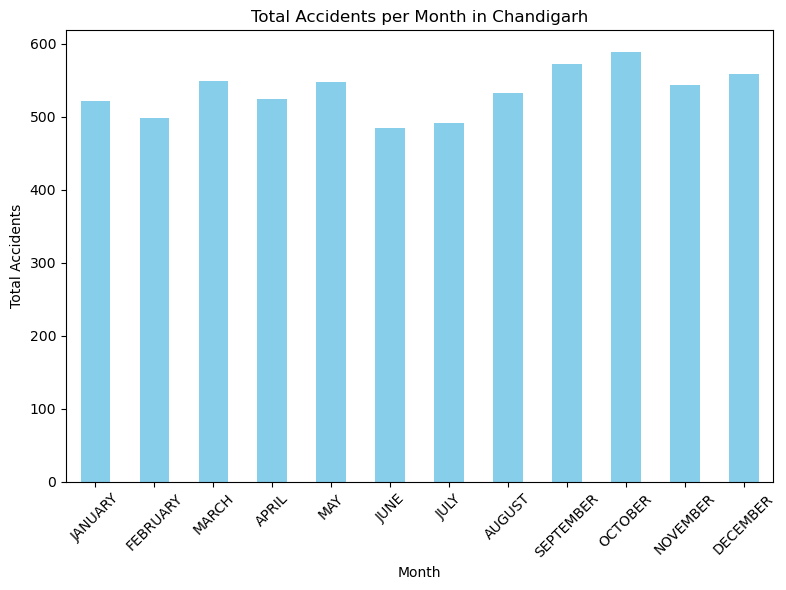


Chhattisgarh: Total Accidents - 117817


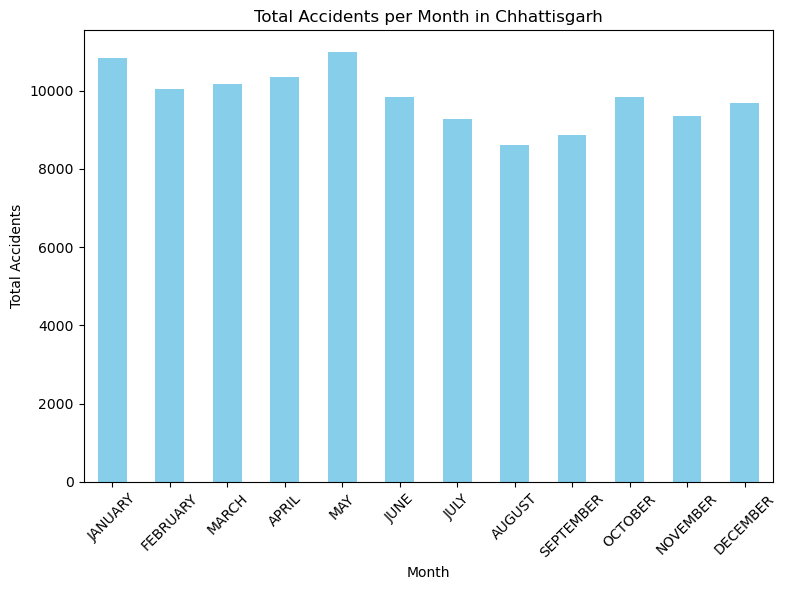


D & N Haveli: Total Accidents - 1216


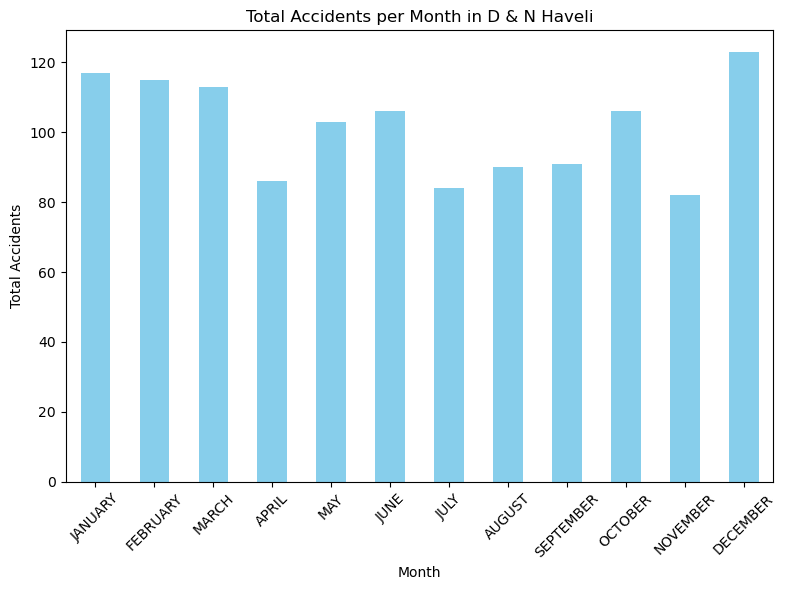


D&N Haveli: Total Accidents - 87


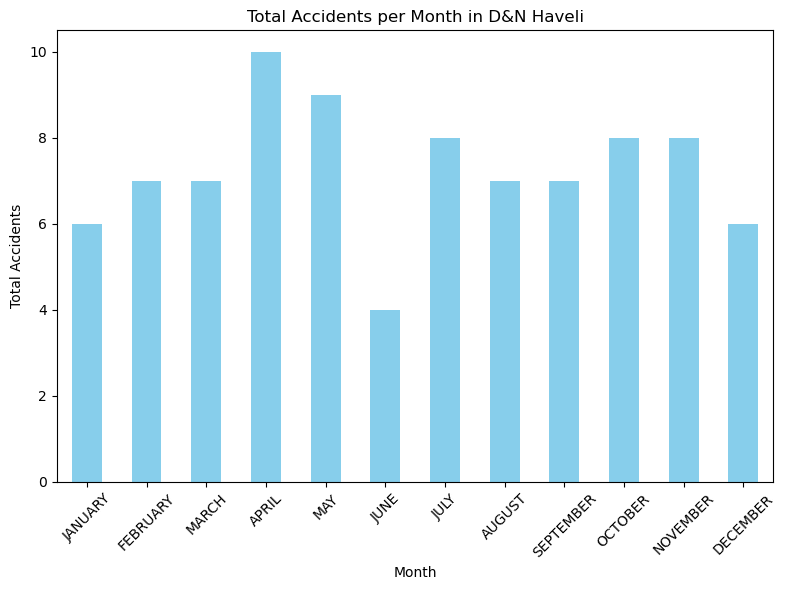


Daman & Diu: Total Accidents - 643


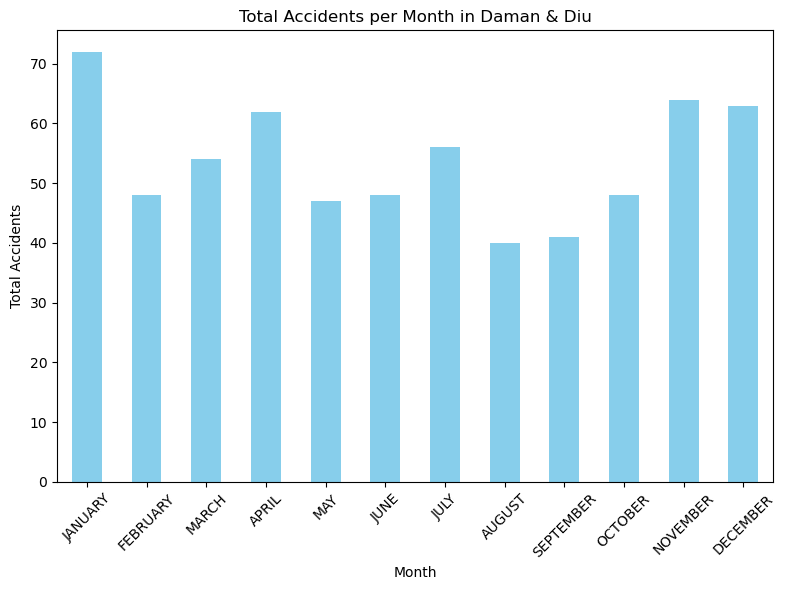


Delhi (Ut): Total Accidents - 110964


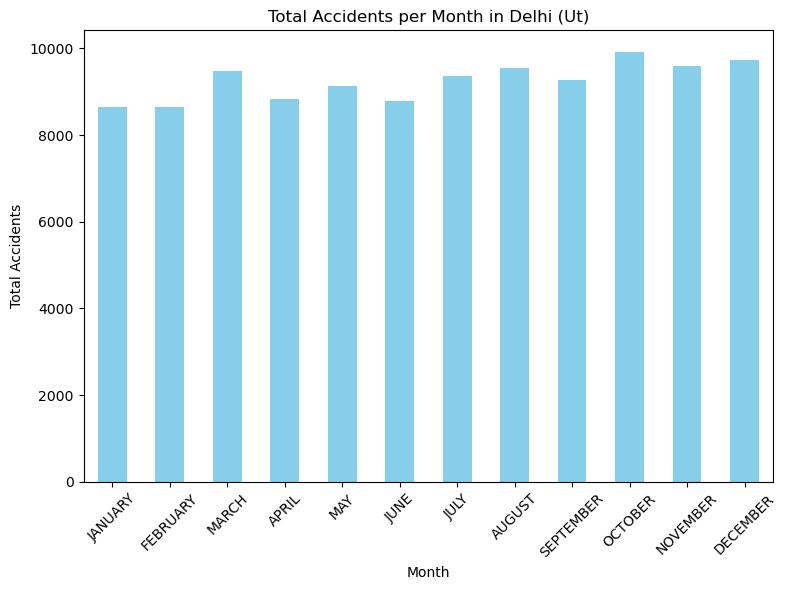


Delhi Ut: Total Accidents - 8310


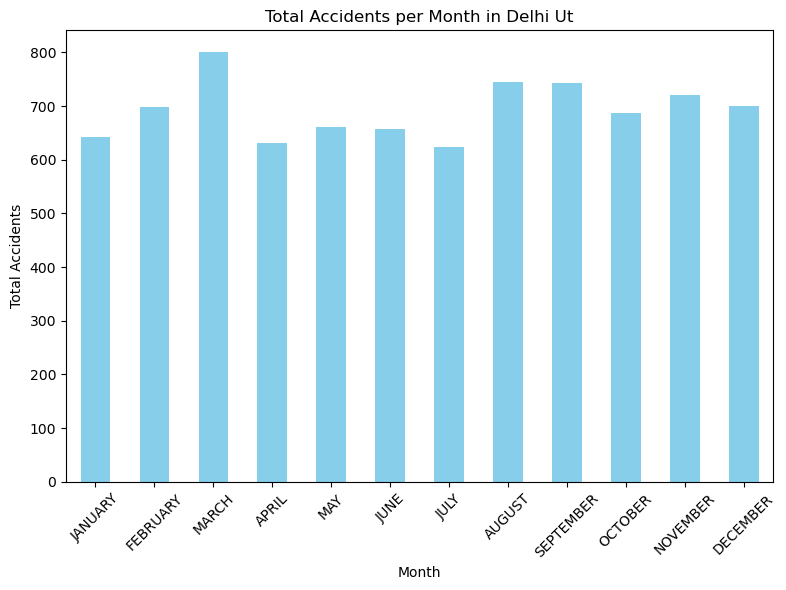


Goa: Total Accidents - 44931


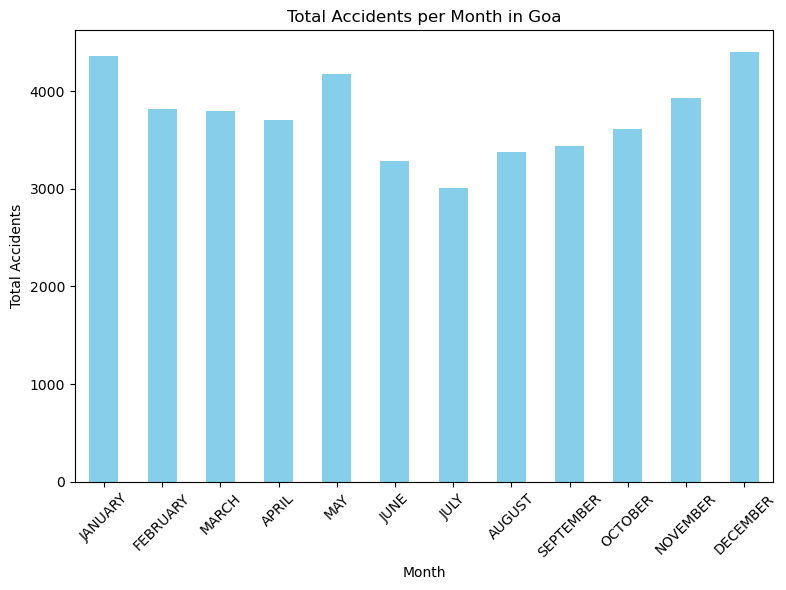


Gujarat: Total Accidents - 300325


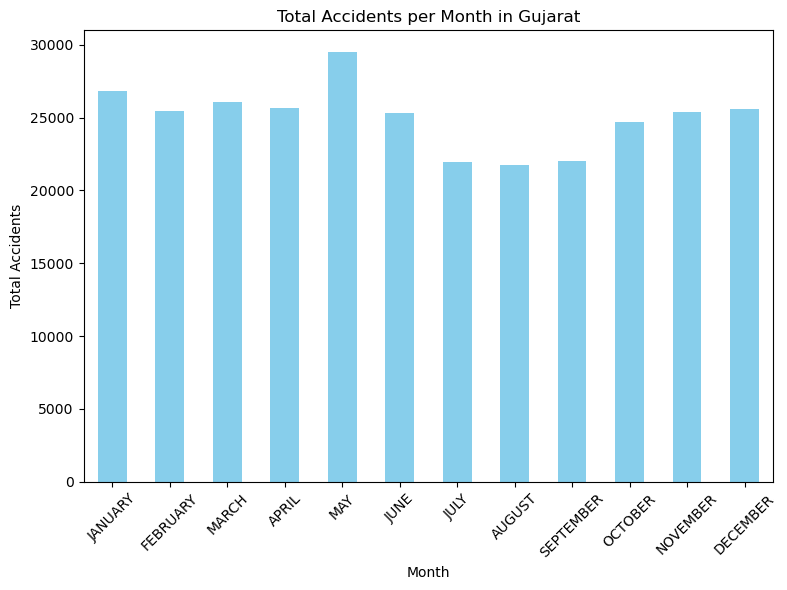


Haryana: Total Accidents - 131921


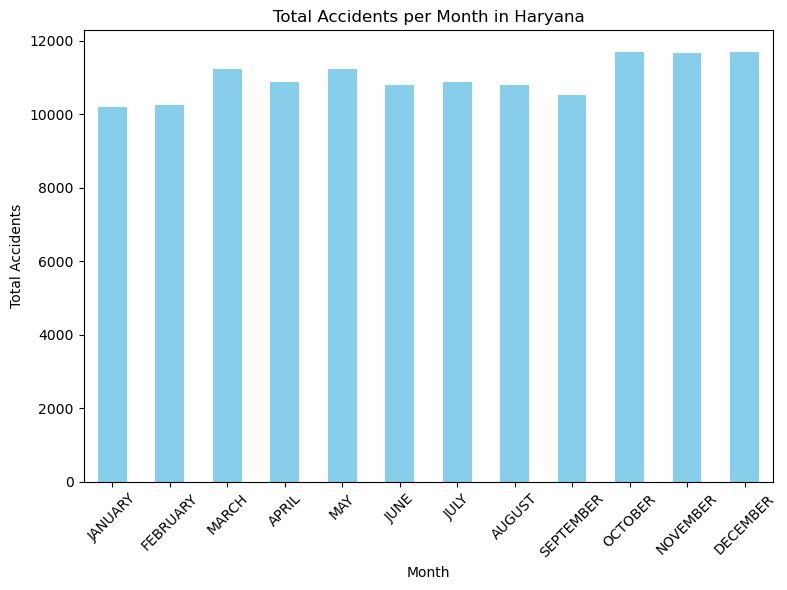


Himachal Pradesh: Total Accidents - 37105


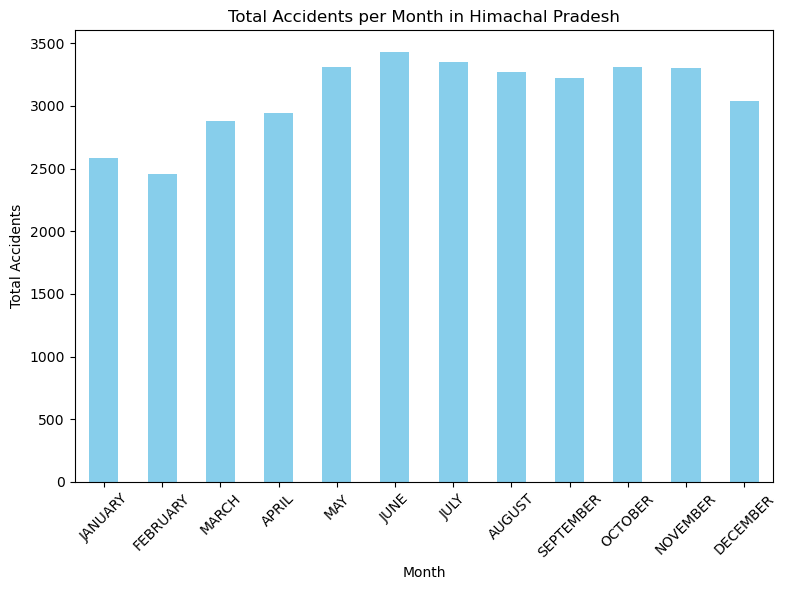


Jammu & Kashmir: Total Accidents - 82820


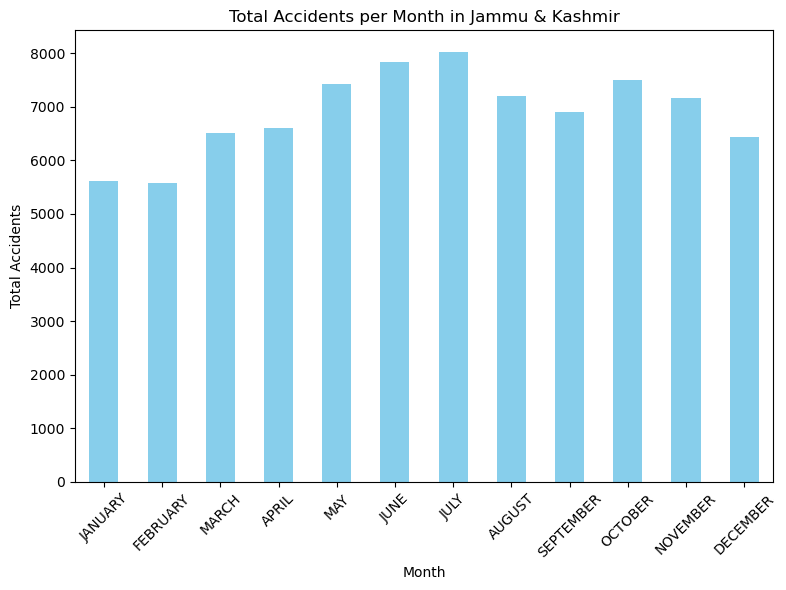


Jharkhand: Total Accidents - 46209


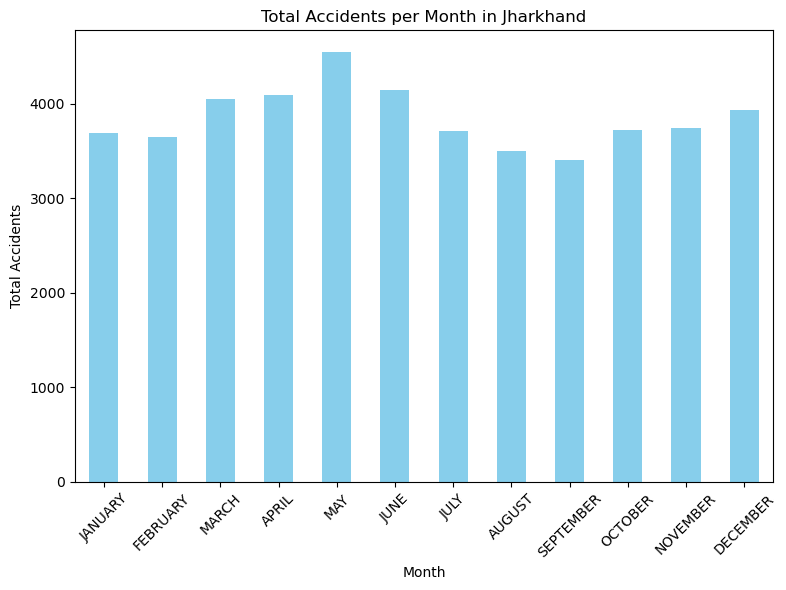


Karnataka: Total Accidents - 584761


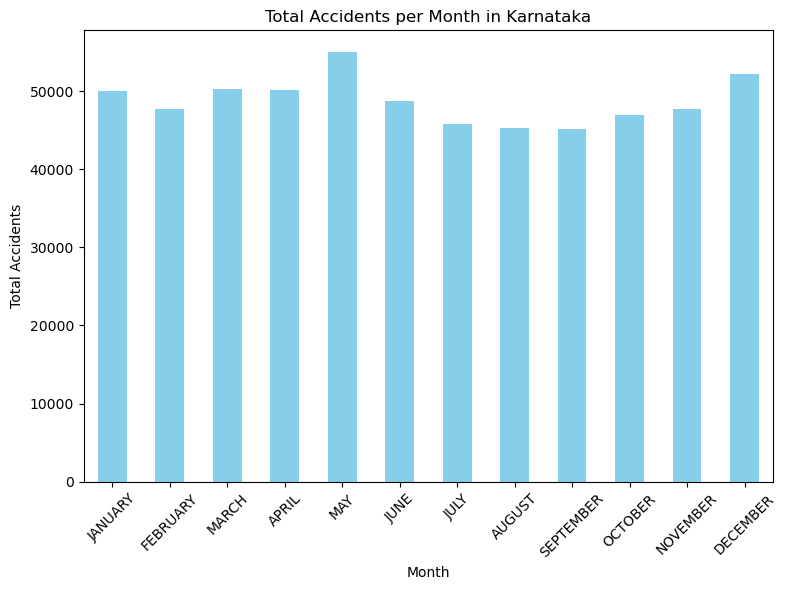


Kerala: Total Accidents - 518161


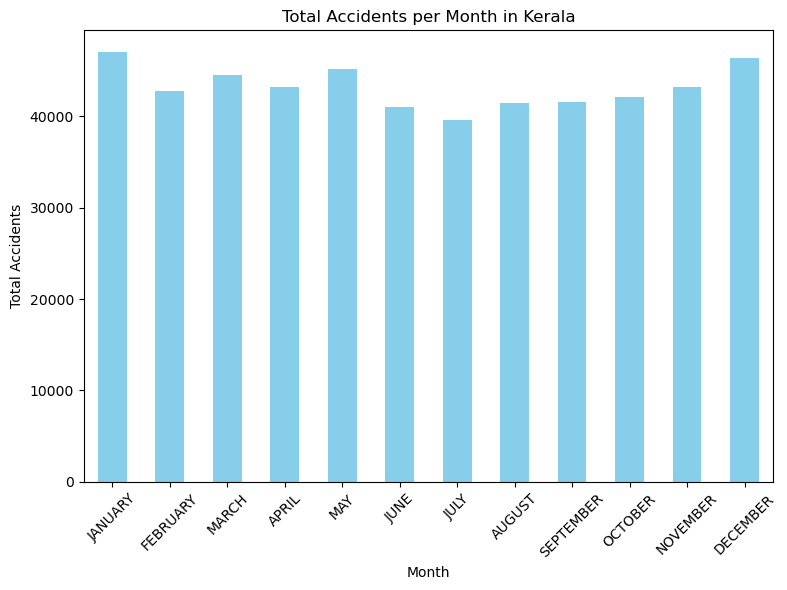


Lakshadweep: Total Accidents - 14


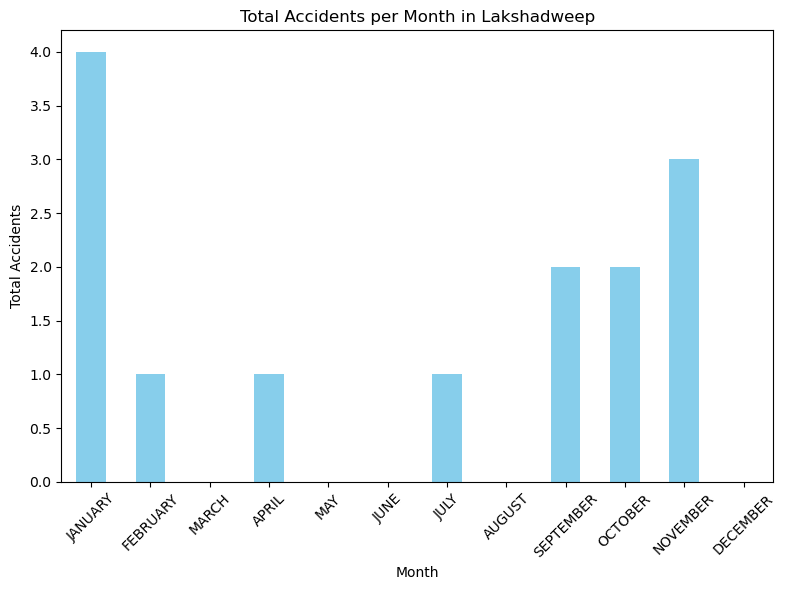


Madhya Pradesh: Total Accidents - 394007


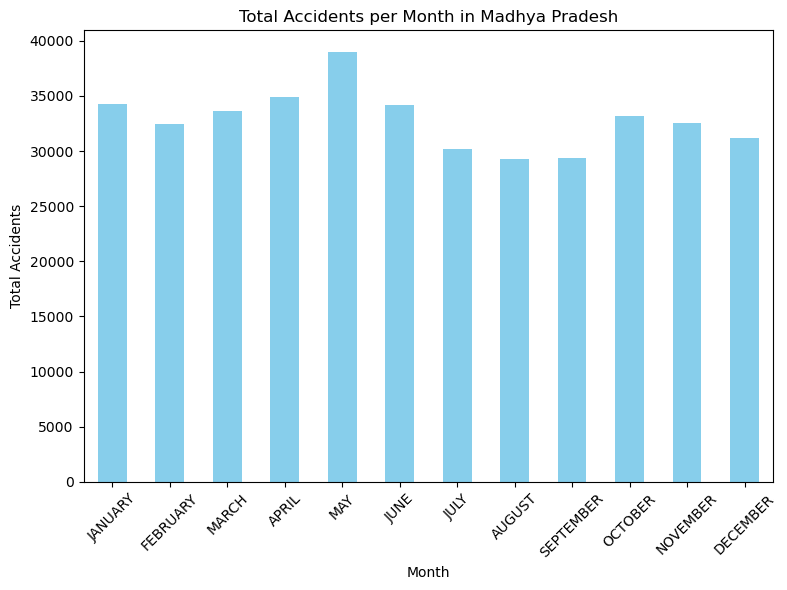


Maharashtra: Total Accidents - 641614


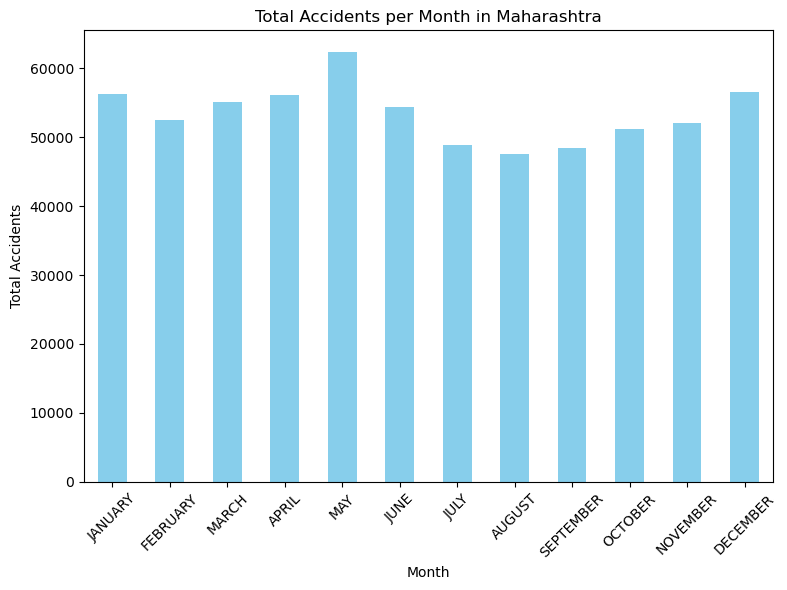


Manipur: Total Accidents - 8130


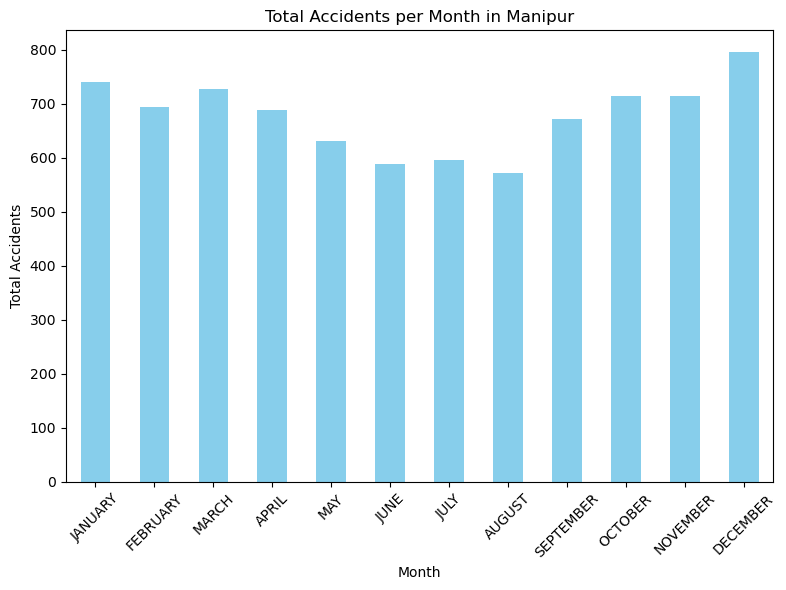


Meghalaya: Total Accidents - 3863


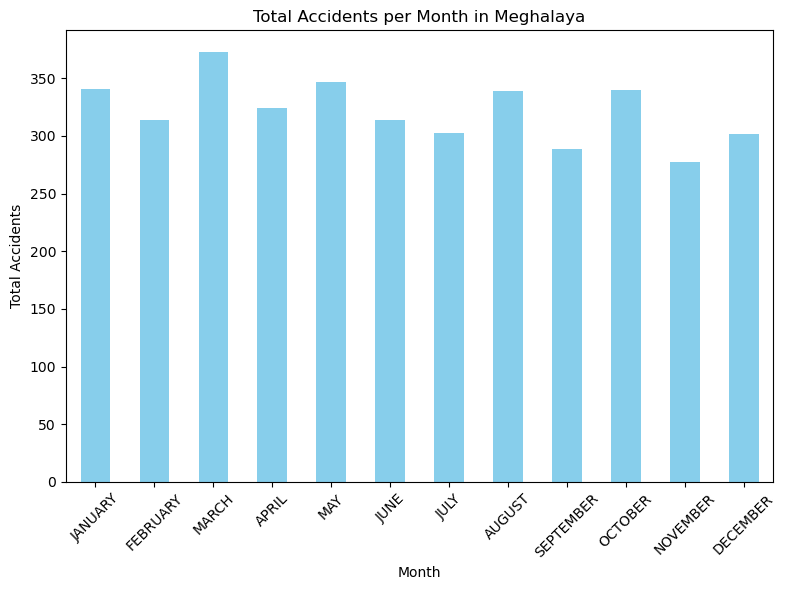


Mizoram: Total Accidents - 1116


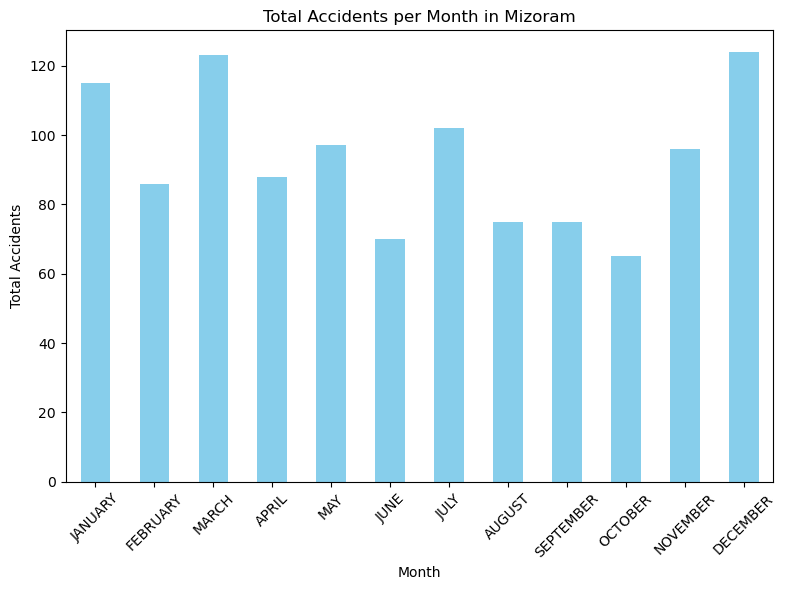


Nagaland: Total Accidents - 781


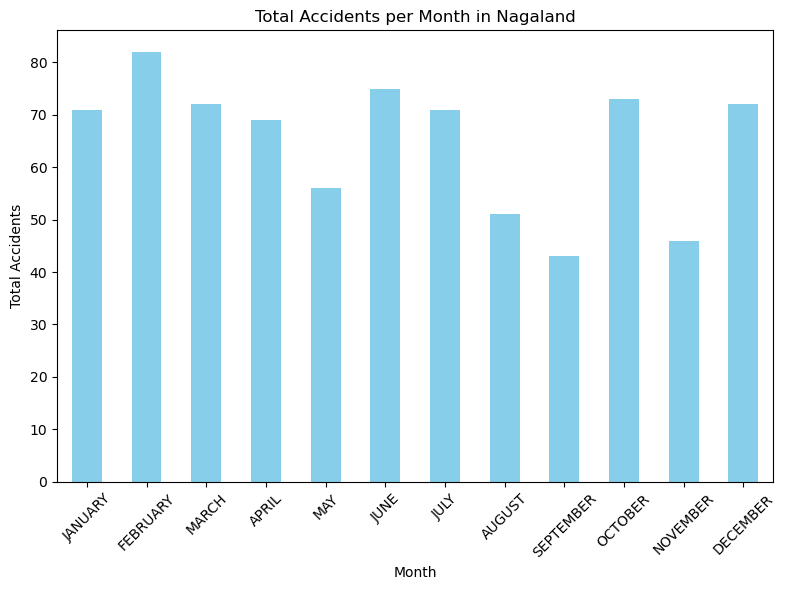


Odisha: Total Accidents - 115237


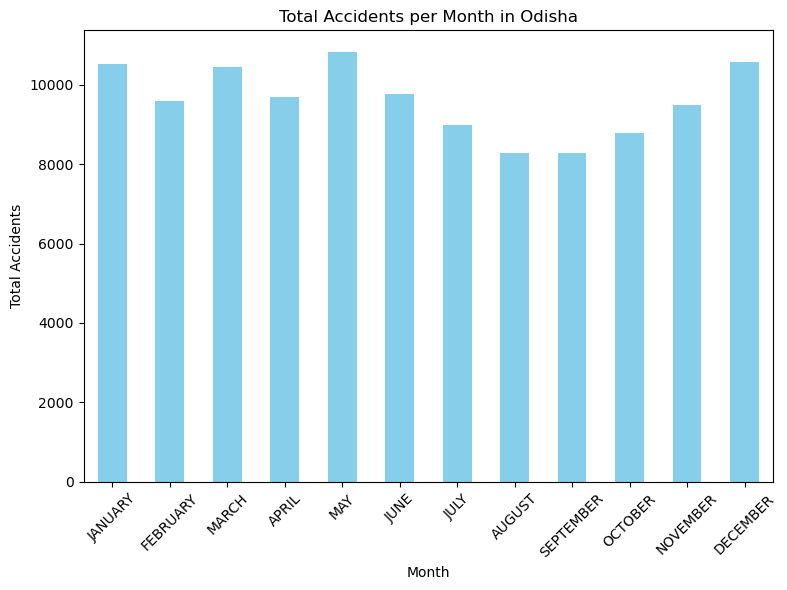


Puducherry: Total Accidents - 21189


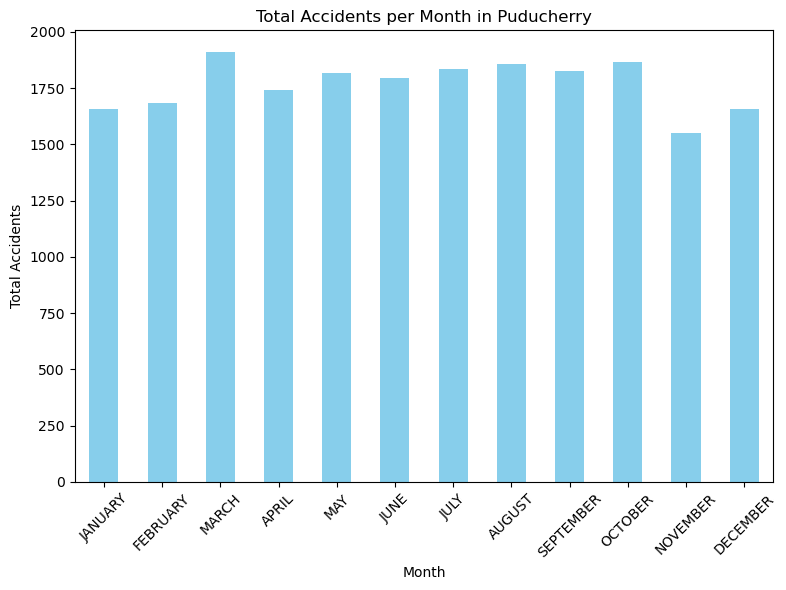


Punjab: Total Accidents - 46804


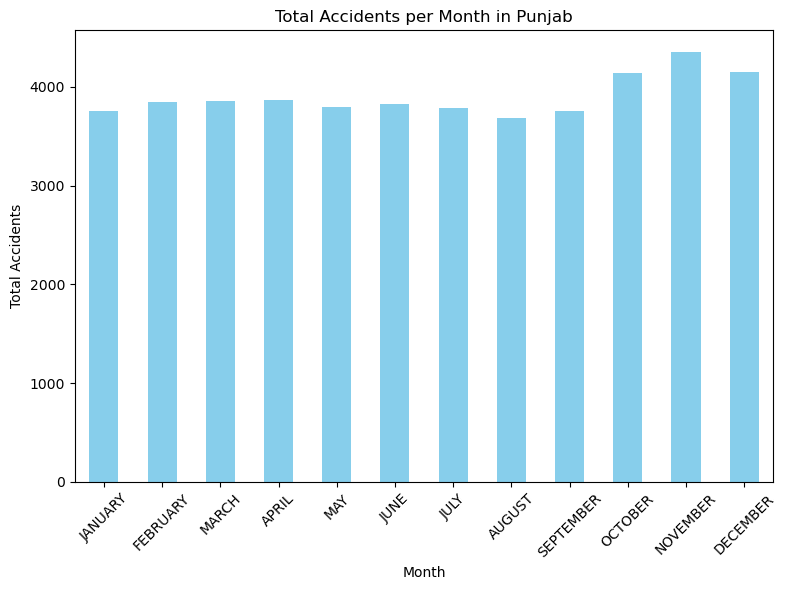


Rajasthan: Total Accidents - 323653


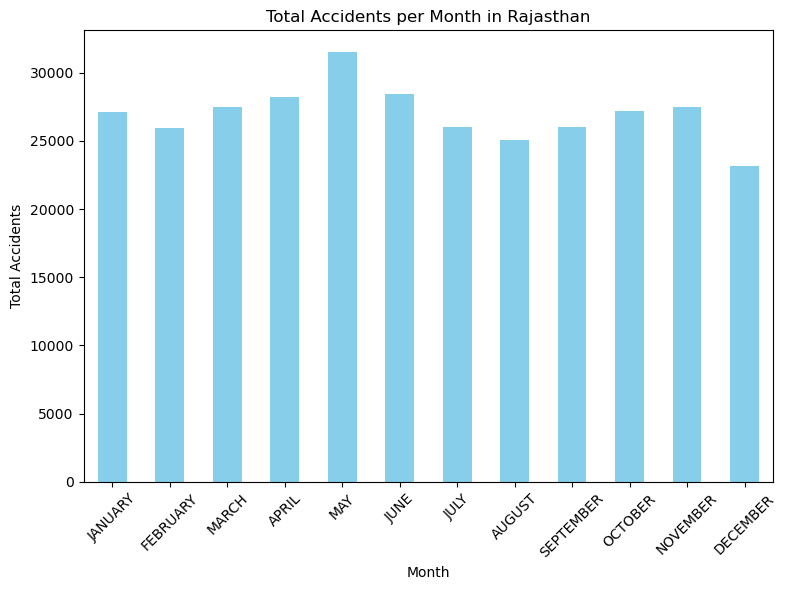


Sikkim: Total Accidents - 2646


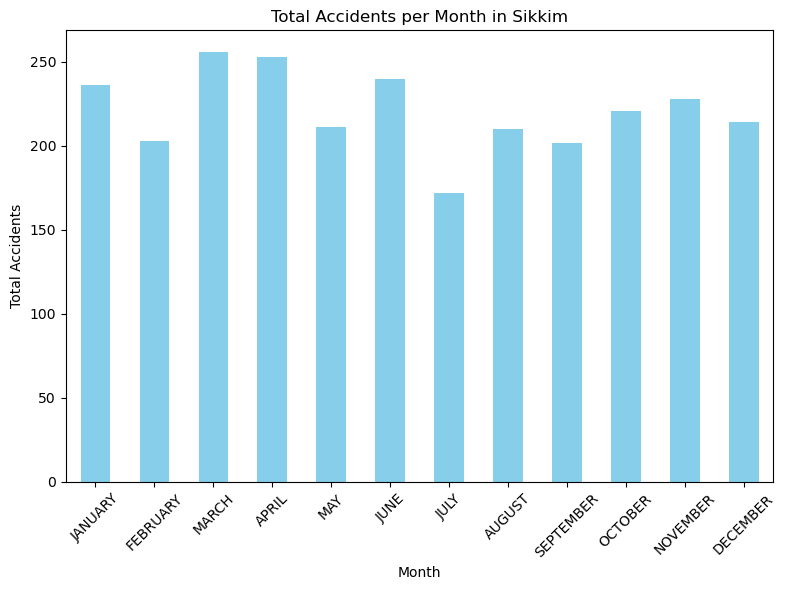


Tamil Nadu: Total Accidents - 852073


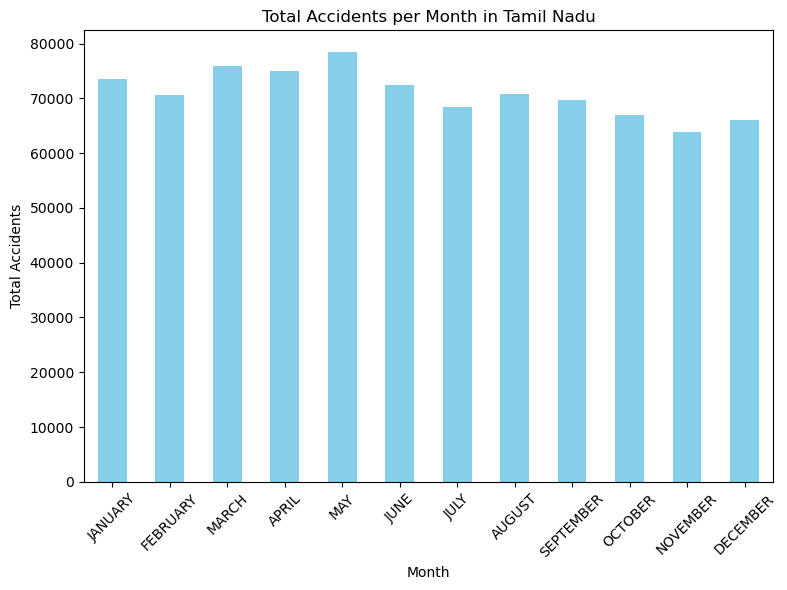


Tripura: Total Accidents - 10534


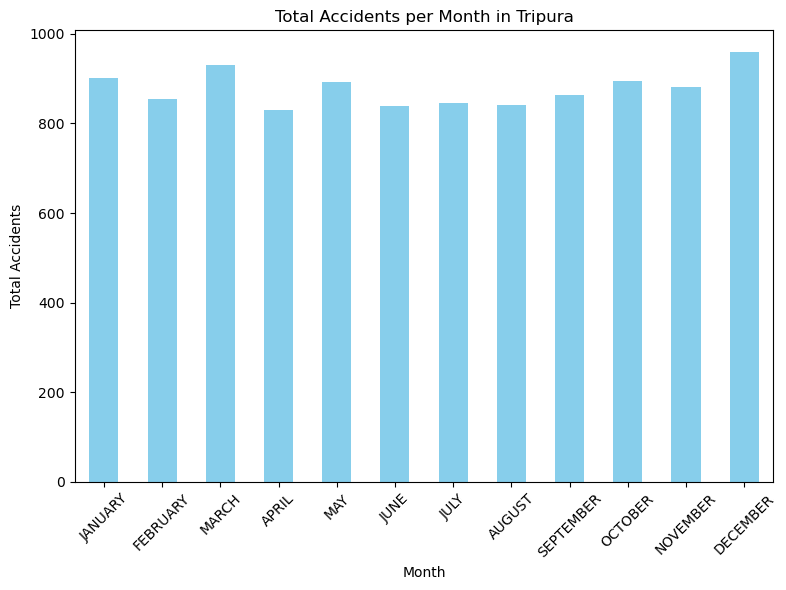


Uttar Pradesh: Total Accidents - 274528


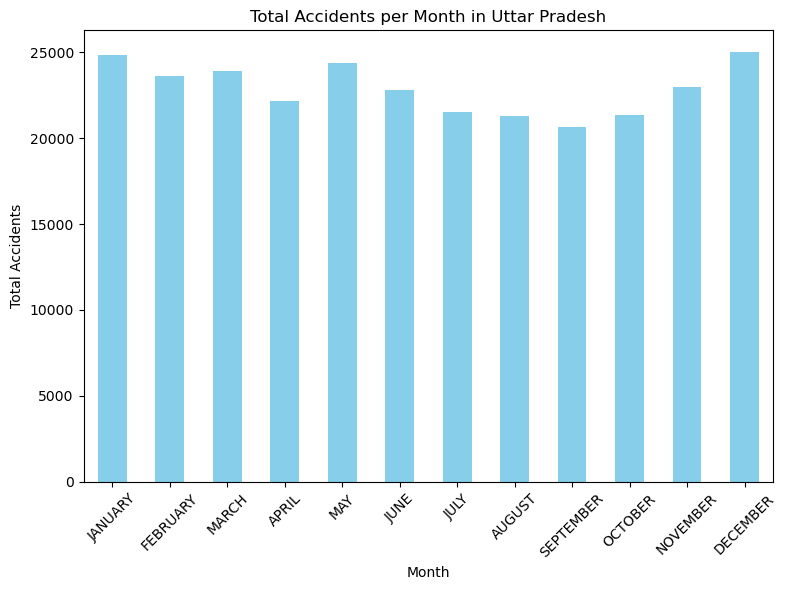


Uttarakhand: Total Accidents - 18192


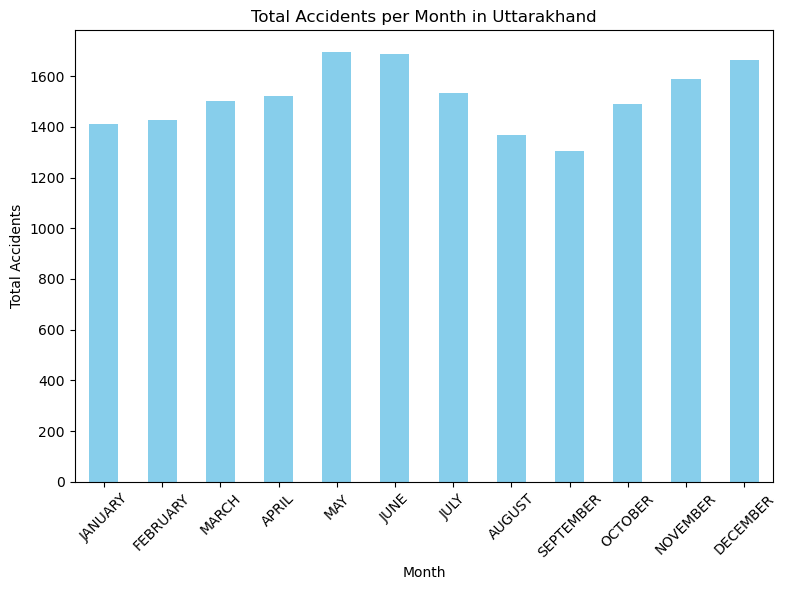


West Bengal: Total Accidents - 189375


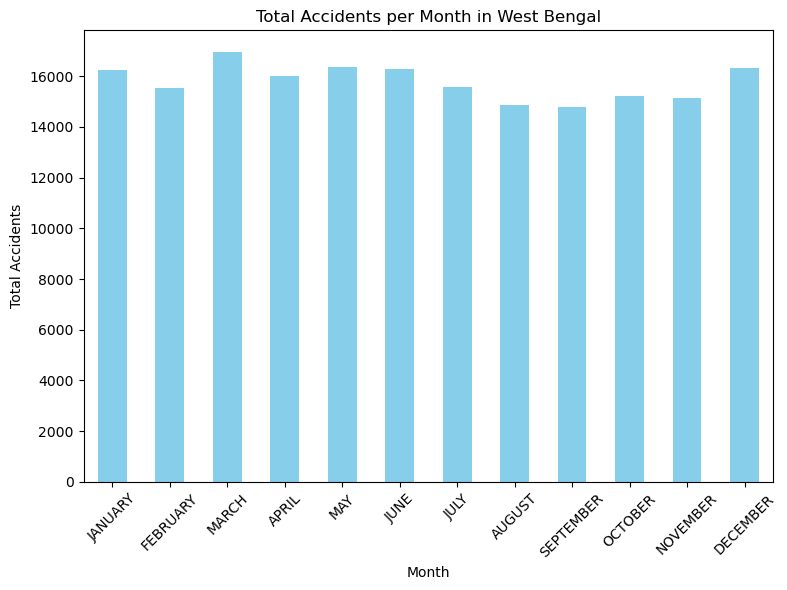

In [5]:
# Loop through each state
for state, state_data in data.groupby('STATE/UT'):
    # Identify hotspots
    state_total = state_data['MONTHLY_TOTAL'].sum()
    print(f"\n{state}: Total Accidents - {state_total}")

    # Plot monthly totals
    monthly_totals = state_data.iloc[:, 2:14].sum()
    plt.figure(figsize=(8, 6))
    monthly_totals.plot(kind='bar', color='skyblue')
    plt.title(f'Total Accidents per Month in {state}')
    plt.xlabel('Month')
    plt.ylabel('Total Accidents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    

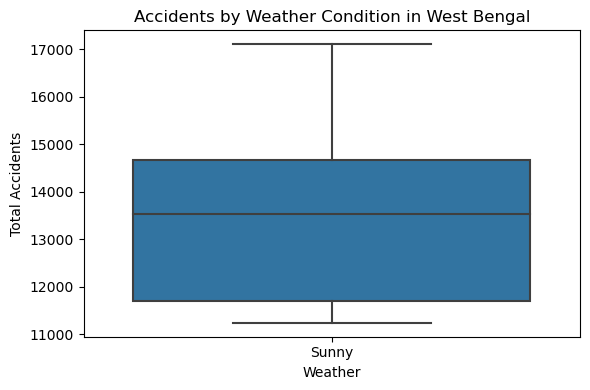

In [6]:
# Analyze contributing factors (for example, weather)
    # Let's say we have weather data available as well
weather_data = {
        'STATE/UT': [state],
        'WEATHER': ['Sunny']  # Replace with actual weather data for each state
    }
weather_df = pd.DataFrame(weather_data)

# Merge weather data with accident data
merged_data = pd.merge(state_data, weather_df, on='STATE/UT')

# Plot accidents by weather
plt.figure(figsize=(6, 4))
sns.boxplot(x='WEATHER', y='MONTHLY_TOTAL', data=merged_data)
plt.title(f'Accidents by Weather Condition in {state}')
plt.xlabel('Weather')
plt.ylabel('Total Accidents')
plt.tight_layout()
plt.show()

In [7]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

# Generate random latitude and longitude values
np.random.seed(0)  # for reproducibility
latitude_data = np.random.uniform(low=8, high=37, size=490)  # Generating 490 random latitude values
longitude_data = np.random.uniform(low=68, high=98, size=490)  # Generating 490 random longitude values

# Create a map centered at a specific location
mymap = folium.Map(location=[20, 80], zoom_start=5)  # Adjust the location and zoom level as needed

# Create a MarkerCluster for better visualization of multiple markers
marker_cluster = MarkerCluster().add_to(mymap)

# Loop through each accident and add a marker to the map
for lat, lon in zip(latitude_data, longitude_data):
    folium.Marker([lat, lon], popup="Accident").add_to(marker_cluster)

# Save the map to an HTML file
mymap.save('accident_hotspots.html')